<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Electromagnetics/full_vs_diffusive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install empymod

     |████████████████████████████████| 225kB 2.8MB/s 


In [0]:
%matplotlib inline


Full wavefield vs diffusive approx. for a fullspace
===================================================

Play around to see that the difference is getting bigger for

- higher frequencies,
- higher eperm/mperm.


In [0]:
import empymod
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Define model
------------



In [0]:
x = (np.arange(1051))*10-500
rx = np.repeat([x, ], np.size(x), axis=0)
ry = rx.transpose()
zsrc = 150
zrec = 200
res = 1/3
freq = 0.5
ab = 11
aniso = np.sqrt(3/.3)
perm = 1
inp = {
    'src': [0, 0, zsrc],
    'rec': [rx.ravel(), ry.ravel(), zrec],
    'res': res,
    'freqtime': freq,
    'aniso': aniso,
    'ab': ab,
    'epermH': perm,
    'epermV': perm,
    'mpermH': perm,
    'mpermV': perm,
    'verb': 0
}

Calculation
-----------



In [0]:
# Halfspace
hs = empymod.analytical(**inp, solution='dfs')
hs = hs.reshape(np.shape(rx))

# Fullspace
fs = empymod.analytical(**inp)
fs = fs.reshape(np.shape(rx))

# Relative error (%)
amperr = np.abs((fs.amp - hs.amp)/fs.amp)*100
phaerr = np.abs((np.angle(fs) - np.angle(hs))/np.angle(fs))*100

Plot
----



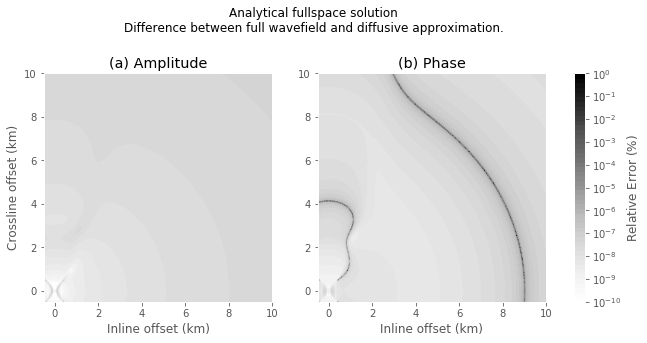

In [7]:
fig, axs = plt.subplots(figsize=(10, 4.2), nrows=1, ncols=2)

# Min and max, properties
vmin = 1e-10
vmax = 1e0
props = {'levels': np.logspace(np.log10(vmin), np.log10(vmax), 50),
         'locator': plt.matplotlib.ticker.LogLocator(), 'cmap': 'Greys'}

# Plot amplitude error
plt.sca(axs[0])
plt.title(r'(a) Amplitude')
cf1 = plt.contourf(rx/1000, ry/1000, amperr.clip(vmin, vmax), **props)
plt.ylabel('Crossline offset (km)')
plt.xlabel('Inline offset (km)')
plt.xlim(min(x)/1000, max(x)/1000)
plt.ylim(min(x)/1000, max(x)/1000)
plt.axis('equal')

# Plot phase error
plt.sca(axs[1])
plt.title(r'(b) Phase')
cf2 = plt.contourf(rx/1000, ry/1000, phaerr.clip(vmin, vmax), **props)
plt.xlabel('Inline offset (km)')
plt.xlim(min(x)/1000, max(x)/1000)
plt.ylim(min(x)/1000, max(x)/1000)
plt.axis('equal')

# Title
plt.suptitle('Analytical fullspace solution\nDifference between full ' +
             'wavefield and diffusive approximation.', y=1.1)

# Plot colorbar
cax, kw = plt.matplotlib.colorbar.make_axes(
        [axs[0], axs[1]], location='right', fraction=.05, pad=0.05, aspect=20)
cb = plt.colorbar(cf2, cax=cax, ticks=10**(-(np.arange(13.)[::-1])+2), **kw)
cb.set_label(r'Relative Error $(\%)$')

# Show
plt.show()

In [8]:
empymod.Report()


* WARNING :: `empymod.Report` requires `scooby`.
             Install it via `pip install scooby`.

